## Credit Card Fraud Detection

Importing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

Reading and Understanding the data

In [ ]:
df = pd.read_csv("card_transdata.csv")

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.shape

(1000000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# checking for missing value
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
# checking for any duplicated values
df[df.duplicated()]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


### Evaluating the Security of Chip and Pin Transaction methods

In [ ]:
chip_df = df[["used_chip","used_pin_number","fraud"]]

In [ ]:
total_transcations = len(chip_df)
total_fraud = chip_df["fraud"].sum()
fraud_by_chip = chip_df[chip_df["used_chip"] == 1]["fraud"].sum()
fraud_by_pin = chip_df[chip_df["used_pin_number"] == 1]["fraud"].sum()

In [ ]:
print("Total Transcations:", total_transcations)
print("Total Fraud cases:", total_fraud)
print("Fraud cases using chip: {} out of {}".format(fraud_by_chip, total_transcations))
print("Fraud cases using pin: {} out of {}".format(fraud_by_pin, total_transcations))

Total Transcations: 1000000
Total Fraud cases: 87403.0
Fraud cases using chip: 22410.0 out of 1000000
Fraud cases using pin: 273.0 out of 1000000


Fraud cases by chip are more than pin

Plotting an pie chart for it


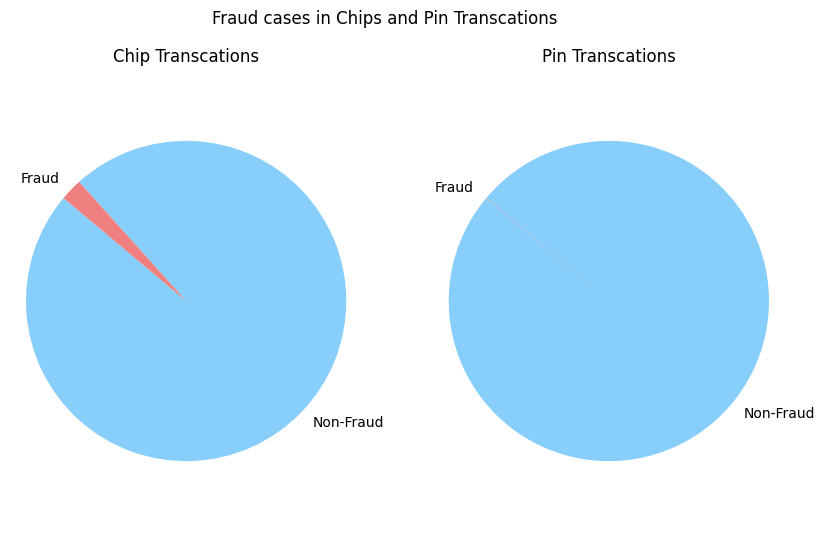

In [ ]:
labels_chip = ["Non-Fraud", "Fraud"]
sizes_chip = [total_transcations - fraud_by_chip, fraud_by_chip]
colors_chip = ["lightskyblue","lightcoral"]

labels_pin = ["Non-Fraud", "Fraud"]
sizes_pin = [total_transcations - fraud_by_pin, fraud_by_pin]
colors_pin = ["lightskyblue","lightcoral"]

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.pie(sizes_chip, labels = labels_chip, colors = colors_chip, startangle = 140)
plt.axis("equal")
plt.title("Chip Transcations")

plt.subplot(1,2,2)
plt.pie(sizes_pin, labels = labels_pin, colors = colors_pin, startangle = 140)
plt.axis("equal")
plt.title("Pin Transcations")
plt.suptitle("Fraud cases in Chips and Pin Transcations")
plt.show()


In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


### Analyzing Repeat Retailer Fraud Patterns

In [ ]:
repeat_retailer_df = df[df["repeat_retailer"]== 1]

In [ ]:
fraud_sequences = []
current_sequences = []

for index, row in repeat_retailer_df.iterrows():
  repeat_retailer, is_fraud = row["repeat_retailer"], row["fraud"]
  if is_fraud == 1:
    # if fraud case, add the current sequence to list
    if current_sequences:
      fraud_sequences.append(current_sequences.copy())
    current_sequences = [] # reset the sequence
  else:
    # if not a fraud case, add the repeat retailer to the current sequence
    current_sequences.append("Repeat Retailer" if repeat_retailer == 1 else "No Repeat Retailer")

for i , sequence in enumerate(fraud_sequences[:10], start =1):
  print(f"Fraud sequence {i}: {','.join(sequence)}")


Fraud sequence 1: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
Fraud sequence 2: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
Fraud sequence 3: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
Fraud sequence 4: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
Fraud sequence 5: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
Fraud sequence 6: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
Fraud sequence 7: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Ret

### Finding Correlation between Transaction and Fraud

In [ ]:
correlation_df = df[["ratio_to_median_purchase_price","fraud"]]

In [ ]:
correlation = correlation_df["ratio_to_median_purchase_price"].corr(correlation_df["fraud"])
print("Correlation between transaction amount and fraud:", correlation)

Correlation between transaction amount and fraud: 0.4623047222882617


In [ ]:
avgnonfraudtranscation = correlation_df[correlation_df["fraud"] == 0]["ratio_to_median_purchase_price"].mean()
avgfraudtranscation = correlation_df[correlation_df["fraud"] == 1]["ratio_to_median_purchase_price"].mean()
print("Average ratio to median purchase price for non fraudelent transcation:", avgnonfraudtranscation)
print("Average ratio to median purchase price for fraudelent transcation:", avgfraudtranscation)

Average ratio to median purchase price for non fraudelent transcation: 1.423641855458059
Average ratio to median purchase price for fraudelent transcation: 6.006323490486969


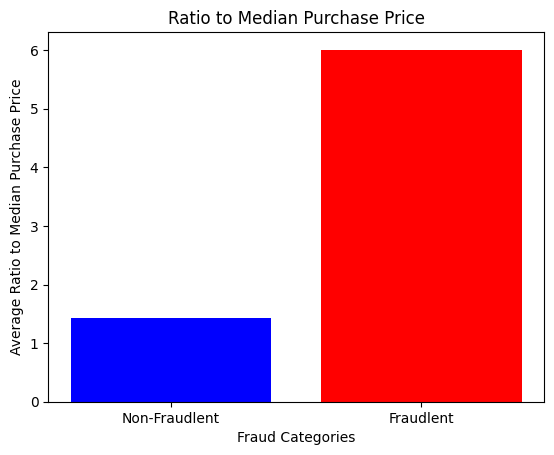

In [ ]:
categories = ["Non-Fraudlent", "Fraudlent"]
average_ratio = [avgnonfraudtranscation,avgfraudtranscation]
plt.bar(categories,average_ratio, color = ["blue","red"])
plt.xlabel("Fraud Categories")
plt.ylabel("Average Ratio to Median Purchase Price")
plt.title("Ratio to Median Purchase Price")
plt.show()

### Analyzing Fraud Cases in Online Transaction

In [ ]:
online_order_df = df[["online_order", "fraud"]]

In [ ]:
total_online_orders = online_order_df["online_order"].sum()
total_online_fraud = online_order_df[(online_order_df["fraud"] == 1) & (online_order_df["online_order"] == 1)]["fraud"].count()
fraud_rate_online = total_online_fraud / total_online_orders

total_offline_orders = len(online_order_df) - total_online_orders
total_offline_fraud = online_order_df[(online_order_df["fraud"] == 1) & (online_order_df["online_order"] == 0)]["fraud"].count()
fraud_rate_offline = total_offline_fraud / total_offline_orders

print(f"Fraud rate for online transactions: {fraud_rate_online:.2%} ({total_online_fraud} cases out of {total_online_orders} online transactions)")
print(f"Fraud rate for offlne transactions: {fraud_rate_offline:.2%} ({total_offline_fraud} cases out of {total_offline_orders} online transactions)")


Fraud rate for online transactions: 12.71% (82711 cases out of 650552.0 online transactions)
Fraud rate for offlne transactions: 1.34% (4692 cases out of 349448.0 online transactions)


### Conducting Feature Selection with Random Forest

In [ ]:
df_rf = df.copy()
df_rf.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
X = df_rf.drop("fraud", axis = 1)
y = df_rf["fraud"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
feature_importances = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False)
print(feature_importances)

ratio_to_median_purchase_price    0.527171
online_order                      0.169382
distance_from_home                0.134910
used_pin_number                   0.063928
used_chip                         0.052078
distance_from_last_transaction    0.045711
repeat_retailer                   0.006820
dtype: float64


ratio_to_median_purchase_price, online_order, distance_from_home has the highest correlation to the target variable (fraud)

### Building Credit Card Fraud Detection model with Random Forest

In [ ]:
x = df.drop("fraud", axis = 1)
y = df["fraud"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
new_transaction_features = df.sample(1).drop("fraud",axis = 1)
print("Randomly sample features for new transcation:")
print(new_transaction_features)

Randomly sample features for new transcation:
        distance_from_home  distance_from_last_transaction  \
107168            1.551867                       14.414842   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
107168                        1.222069              0.0        0.0   

        used_pin_number  online_order  
107168              0.0           0.0  


In [ ]:
predictions = rf_classifier.predict(new_transaction_features)
print("Predictions for new transaction")
print("Fraud" if predictions[0] == 1 else "Legitimate")

Predictions for new transaction
Legitimate


In [ ]:
new_transaction_features_df = pd.DataFrame({
    "distance_from_home": [85],
    "distance_from_last_transaction": [75],
    "ratio_to_median_purchase_price": [5.1],
    "repeat_retailer": [0],
    "used_chip": [0],
    "used_pin_number": [0],
    "online_order": [1]
})

predictions = rf_classifier.predict(new_transaction_features_df)
print("Predictions for new transaction")
print("Fraud" if predictions[0] == 1 else "Legitimate")

Predictions for new transaction
Fraud


### Building Credit Card Fraud Detection model with Logistic Regression

#### Scaling the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
logreg = LogisticRegression(max_iter= 1000, random_state = 42)
logreg.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
new_transaction_features_df = pd.DataFrame({
    "distance_from_home": [89],
    "distance_from_last_transaction": [15],
    "ratio_to_median_purchase_price": [2.3],
    "repeat_retailer": [1],
    "used_chip": [0],
    "used_pin_number": [1],
    "online_order": [1]
})

predictions = logreg.predict(scaler.transform(new_transaction_features_df))
print("Predictions for new transaction")
print("Fraud" if predictions[0] == 1 else "Legitimate")

Predictions for new transaction
Legitimate


### Building Credit Card Fraud Detection model with Support Vector Machine

In [ ]:
df_svm = df.copy().sample(1000, random_state = 42)
df_svm.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
987231,0.929509,1.296477,0.361110,0.0,0.0,0.0,1.0,0.0
79954,0.611179,0.208295,3.118884,0.0,0.0,0.0,1.0,0.0
567130,3.956062,0.529194,1.579942,1.0,0.0,0.0,0.0,0.0
500891,21.798902,0.019399,11.416909,1.0,0.0,0.0,0.0,0.0
55399,3.310635,1.707802,2.028915,1.0,0.0,0.0,0.0,0.0


In [ ]:
x = df_svm.drop("fraud", axis = 1)
y = df_svm["fraud"]

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
scv_classifier = SVC(kernel = "linear", probability = True, random_state = 42)
calibrated_svm = CalibratedClassifierCV(scv_classifier)
calibrated_svm.fit(x_scaled, y)

CalibratedClassifierCV(estimator=SVC(kernel='linear', probability=True,
                                     random_state=42))

In [ ]:
distance_from_home = float(input("Enter Ditance from Home: "))
distance_from_last_transaction = float(input("Enter Distance from Last Transaction: "))
ratio_to_median_purchase_price = float(input("Enter Ratio to Median Purchase Price: "))
repeat_retailer = int(input("Enter 1 for Repeat Retailer, 0 for No Repeat Retailer: "))
used_chip = int(input("Enter 1 for Used Chip, 0 for No Used Chip: "))
used_pin_number = int(input("Enter 1 for Used Pin Number, 0 for No Used Pin Number: "))
online_order = int(input("Enter 1 for Online Order, 0 for Offline Order: "))

new_transaction_features_df = pd.DataFrame({
    "distance_from_home": [distance_from_home],
    "distance_from_last_transaction": [distance_from_last_transaction],
    "ratio_to_median_purchase_price": [ratio_to_median_purchase_price],
    "repeat_retailer": [repeat_retailer],
    "used_chip": [used_chip],
    "used_pin_number": [used_pin_number],
    "online_order": [online_order]

})

scaled_transactions = scaler.transform(new_transaction_features_df)
predictions = calibrated_svm.predict(scaled_transactions)
probability_of_fraud = calibrated_svm.predict_proba(scaled_transactions)[:,1][0]
print("Predictions for new transaction")
print("Fraud" if predictions[0] == 1 else "Legitimate")
print("Probabilty of Fraud:",probability_of_fraud * 100)

Enter Ditance from Home: 72
Enter Distance from Last Transaction: 62
Enter Ratio to Median Purchase Price: 7.2
Enter 1 for Repeat Retailer, 0 for No Repeat Retailer: 1
Enter 1 for Used Chip, 0 for No Used Chip: 1
Enter 1 for Used Pin Number, 0 for No Used Pin Number: 0
Enter 1 for Online Order, 0 for Offline Order: 0
Predictions for new transaction
Legitimate
Probabilty of Fraud: 7.7745124583842635


### Evaluating model performance with precision, recall and f1 score

In [ ]:
y_pred = logreg.predict(x_test_scaled)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Evaluation for Logistic model ")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

In [ ]:
y_pred = rf_classifier.predict(x_test_scaled)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Evaluation for Random Forest model ")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

In [ ]:
y_pred = calibrated_svm.predict(x_test_scaled)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Evaluation for SVM model ")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)